# Load Data

In [101]:
import pandas as pd

df = pd.read_csv("03_Clustering_Marketing.csv")  
df.head()

gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0     0         0        3   

   hollister  abercrombie  die  death  drunk  drugs  
0          0            0    0      0      0      0  
1          0            0    0      0      1      0  
2          0            0    0      0      1      1  
3          0            0    0      0      0      0  
4          0            0    0      0      0      0  

[5 rows x 40 columns]

In [102]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0         0           0         0  ...       0     0         0        0   
1         0           0         1  ...       0     0         0        0   
2         0           0         0  ...       0     1         0        0   
3         0           0         0  ...       0     0         0        0   
4         0           0         1  ...       0     0         0        3   

   hollister  abercrombie  die  death  drunk  drugs  
0          0            0    0      0      0      0  
1          0            0    0      0      1      0  
2          0            0    0      0      1      1  
3          0            0    0      0      0      0  
4          0            0    0      0      0      0  

[5 rows x 40 columns]

In [103]:
# Missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64


# Data Cleaning

In [104]:
# Drop nulls
df_clean = df.dropna()
print(f"Total rows before cleaning: {len(df)}")
print(f"Total rows after cleaning: {len(df_clean)}")

Total rows before cleaning: 15000
Total rows after cleaning: 12042


In [105]:
df_clean['age']  # We notice that age is an object in a float format and should be int

1         17.41
2        17.511
4        16.657
5        18.034
6         18.53
          ...  
14995    16.329
14996    16.545
14997    17.999
14998    17.903
14999    15.811
Name: age, Length: 12042, dtype: object

In [106]:
df_clean = df_clean.copy()

# Clean 'age' column
df_clean.loc[:, 'age'] = pd.to_numeric(df_clean['age'], errors='coerce')

# Filter for reasonable age range (13-20)
df_final = df_clean[(df_clean['age'] >= 13) & (df_clean['age'] <= 20)].copy()
df_final['age'] = df_clean['age'].apply(lambda x: round(x, 0))  # Round age to nearest integer.

print(f"Total rows before age filtering: {len(df_clean)}")
print(f"Total rows after age filtering: {len(df_final)}")

Total rows before age filtering: 12042
Total rows after age filtering: 11579


# Checking labels' balance

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Rows per gender after cleaning:
gender
F    9340
M    2239
Name: count, dtype: int64

Gender Statistics:
Mode: F


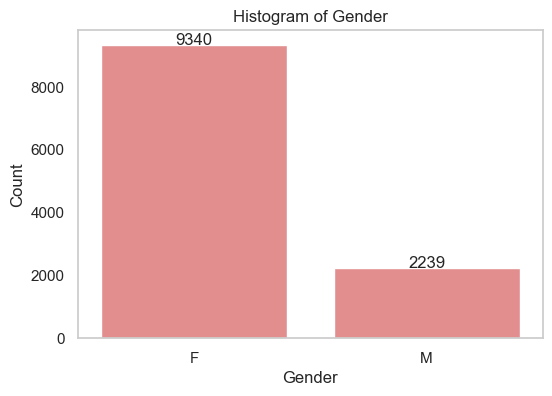

In [108]:
# === GENDER ===

print("Rows per gender after cleaning:")
print(df_final['gender'].value_counts())

print("\nGender Statistics:")
print("Mode:", df_final['gender'].mode()[0])

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_final, x='gender', color='lightcoral')
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 3, f'{int(height)}', ha='center')

plt.show()

Rows per age after cleaning:
age
17.0    3090
18.0    2983
16.0    2737
19.0    1965
15.0     698
20.0      86
14.0      16
13.0       4
Name: count, dtype: int64

Age Statistics:
count    11579.000000
mean        17.256844
std          1.197039
min         13.000000
25%         16.000000
50%         17.000000
75%         18.000000
max         20.000000
Name: age, dtype: float64
Median: 17.0


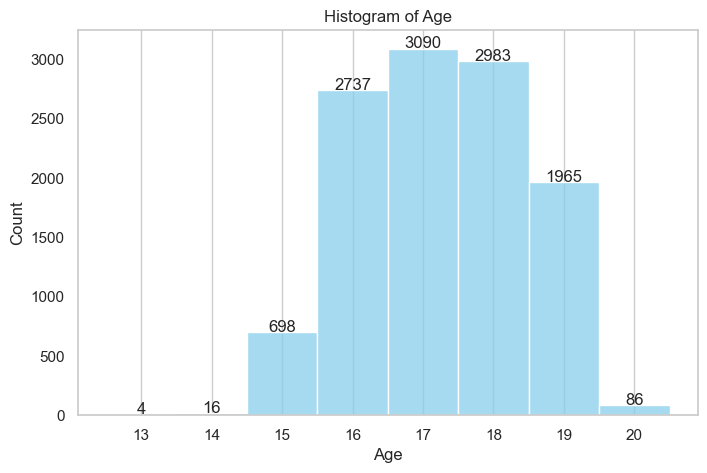

In [110]:
# === AGE ===

print("Rows per age after cleaning:")
print(df_final['age'].value_counts())

print("\nAge Statistics:")
print(df_final['age'].describe())
print("Median:", df_final['age'].median())

plt.figure(figsize=(8,5))
ax = sns.histplot(df_final['age'], binwidth=1, discrete=True, shrink=1, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')

# Add labels on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 5, f'{int(height)}', ha='center')

plt.show()

Rows per gender and age after cleaning:
gender  age 
F       13.0       3
        14.0      12
        15.0     623
        16.0    2293
        17.0    2509
        18.0    2373
        19.0    1476
        20.0      51
M       13.0       1
        14.0       4
        15.0      75
        16.0     444
        17.0     581
        18.0     610
        19.0     489
        20.0      35
dtype: int64


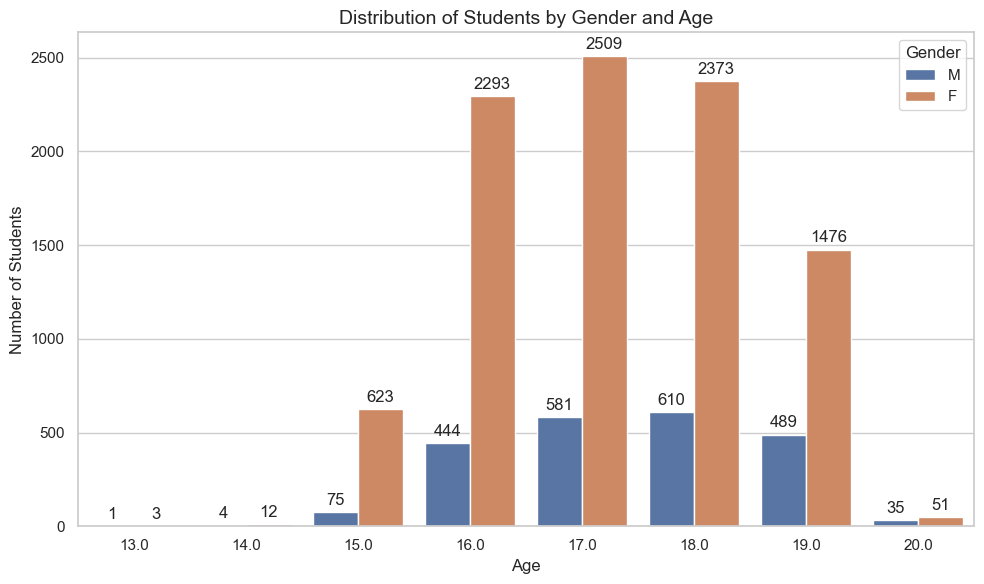

In [111]:
# === GENDER AND AGE ===

print("Rows per gender and age after cleaning:")
print(df_final.groupby(['gender', 'age']).size())

# Set plot style
sns.set(style="whitegrid")

# Create the grouped bar chart for gender and age
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_final, x='age', hue='gender', order=sorted(df_final['age'].unique()))

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

# Title and labels
plt.title('Distribution of Students by Gender and Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

Rows per graduation year after cleaning:
gradyear
2006    2987
2007    2897
2008    2895
2009    2800
Name: count, dtype: int64

Graduation Year Statistics:
Mode: 2006


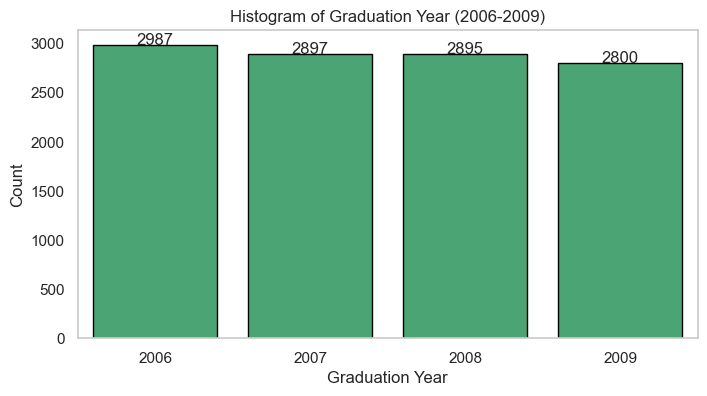

In [112]:
# === GRADUATION YEAR ===

print("Rows per graduation year after cleaning:")
print(df_final['gradyear'].value_counts())

print("\nGraduation Year Statistics:")
print("Mode:", df_final['gradyear'].mode()[0])

plt.figure(figsize=(8,4))
ax = sns.countplot(data=df_final, x='gradyear', color='mediumseagreen', edgecolor='black')
plt.title('Histogram of Graduation Year (2006-2009)')
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks([0, 1, 2, 3], [2006, 2007, 2008, 2009])

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 3, f'{int(height)}', ha='center')

plt.show()

Rows per gender and graduation year after cleaning:
gender  gradyear
F       2006        2310
        2007        2310
        2008        2379
        2009        2341
M       2006         677
        2007         587
        2008         516
        2009         459
dtype: int64


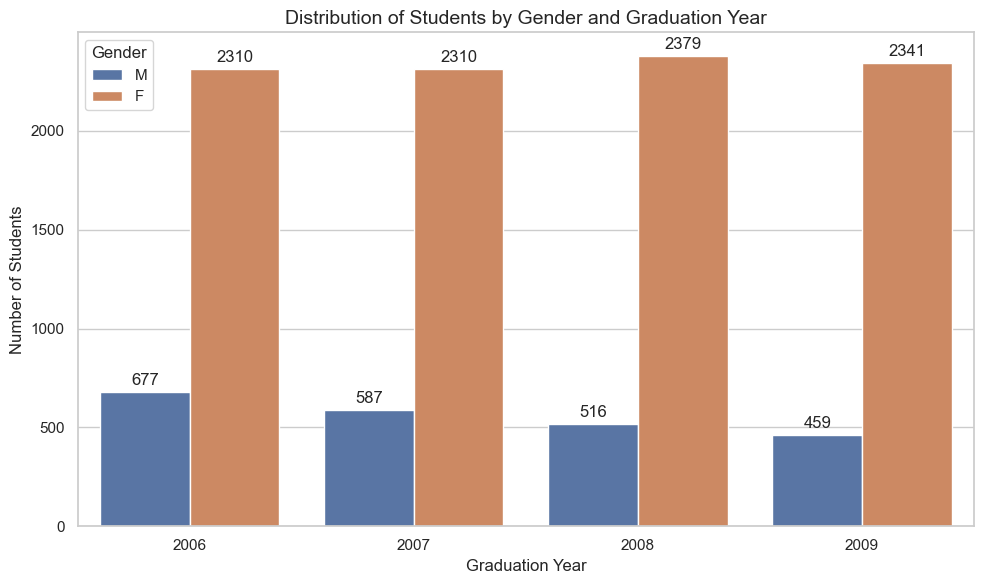

In [113]:
# === GENDER AND GRADUATION YEAR ===

print("Rows per gender and graduation year after cleaning:")
print(df_final.groupby(['gender', 'gradyear']).size())

# Set plot style
sns.set(style="whitegrid")

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_final, x='gradyear', hue='gender')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

# Title and labels
plt.title('Distribution of Students by Gender and Graduation Year', fontsize=14)
plt.xlabel('Graduation Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

Number of friends statistics:
count    11579.000000
mean        30.486657
std         35.416531
min          0.000000
25%          5.000000
50%         21.000000
75%         44.000000
max        605.000000
Name: NumberOffriends, dtype: float64
Median: 21.0


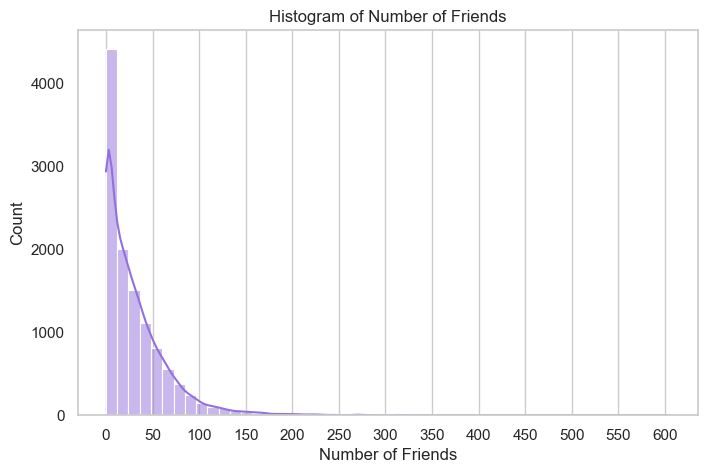

In [114]:
# === NUMBER OF FRIENDS ===

print("Number of friends statistics:")
print(df_final['NumberOffriends'].describe())
print("Median:", df_final['NumberOffriends'].median())

plt.figure(figsize=(8,5))
ax = sns.histplot(df_final['NumberOffriends'], bins=50, kde=True, color='mediumpurple')
plt.title('Histogram of Number of Friends')
plt.xlabel('Number of Friends')
plt.ylabel('Count')
#add ticks of 50 
plt.xticks(range(0, df_final['NumberOffriends'].max(), 50))
plt.grid(axis='y')
plt.show()

C:\Users\amits\AppData\Local\Temp\ipykernel_25244\2895367957.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


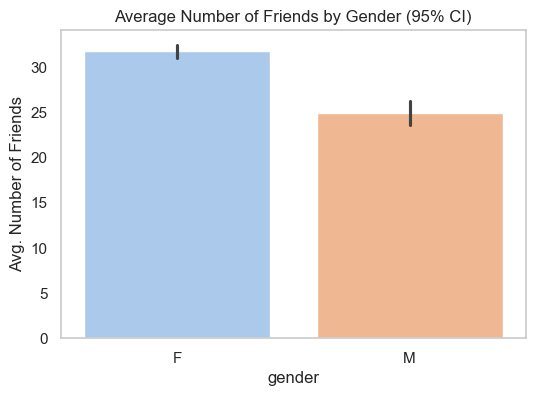

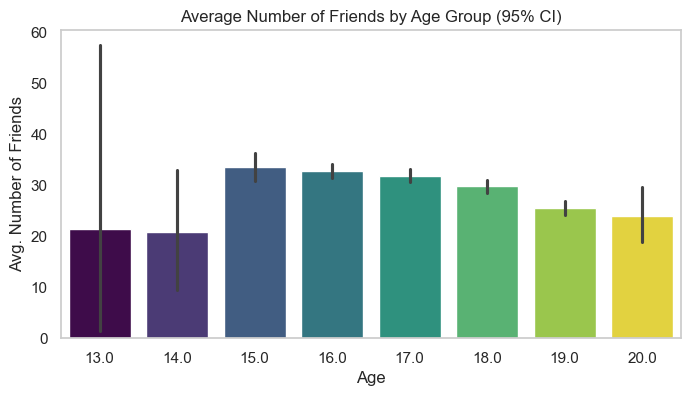

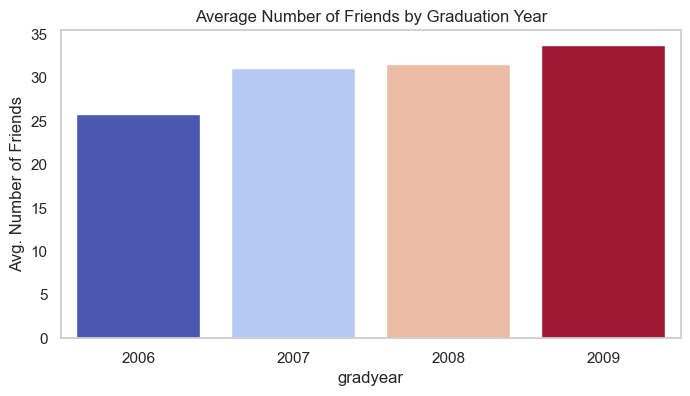

In [115]:
# === GENDER AND NUMBER OF FRIENDS ===
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df_final,
    x='gender',
    y='NumberOffriends',
    hue='gender',
    palette='pastel',
    errorbar=('ci', 95)
)
plt.title('Average Number of Friends by Gender (95% CI)')
plt.ylabel('Avg. Number of Friends')
plt.grid(axis='y')
plt.legend().remove()
plt.show()


# === AGE AND NUMBER OF FRIENDS ===
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_final,
    x='age',
    y='NumberOffriends',
    hue='age',
    palette='viridis',
    errorbar=('ci', 95)
)
plt.title('Average Number of Friends by Age Group (95% CI)')
plt.xlabel('Age')
plt.ylabel('Avg. Number of Friends')
plt.grid(axis='y')
plt.legend().remove()
plt.show()


# === GRADUATION YEAR AND NUMBER OF FRIENDS ===
avg_friends_by_gradyear = df_final.groupby('gradyear', as_index=False)['NumberOffriends'].mean()
plt.figure(figsize=(8, 4))
sns.barplot(
    data=avg_friends_by_gradyear,
    x='gradyear',
    y='NumberOffriends',
    hue='gradyear',
    palette='coolwarm',
    legend=False
)
plt.title('Average Number of Friends by Graduation Year')
plt.ylabel('Avg. Number of Friends')
plt.grid(axis='y')
plt.show()

Rows per friends group after cleaning:
friends_group
0-50        9220
51-100      1874
101-200      436
201-500       47
501-1000       2
1000+          0
Name: count, dtype: int64


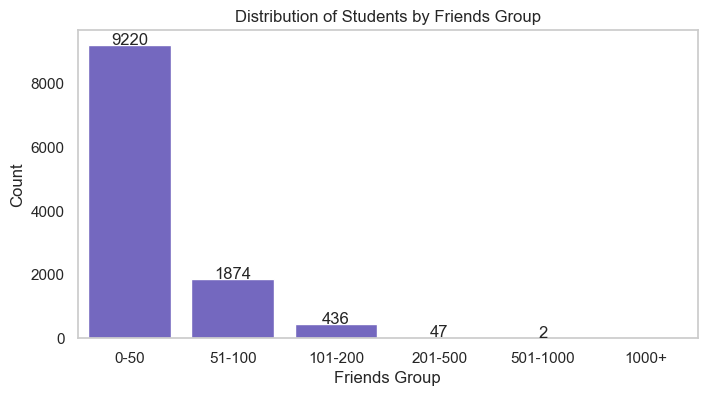

In [116]:
# Grouping by number of friends
df_final['friends_group'] = pd.cut(df_final['NumberOffriends'], bins=[-1, 50, 100, 200, 500, 1000, float('inf')],
                                   labels=['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+'],
                                   right=True)
print("Rows per friends group after cleaning:")
print(df_final['friends_group'].value_counts())

# Histogram of Friends Group (Categorical)
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df_final,
    x='friends_group',
    order=df_final['friends_group'].value_counts().sort_index().index,
    color='slateblue'
)
plt.title('Distribution of Students by Friends Group')
plt.xlabel('Friends Group')
plt.ylabel('Count')
plt.grid(axis='y')

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 3, f'{int(height)}', ha='center')

plt.show()

In [117]:
print(df_final.columns)
df_final.to_csv("cleaned_students_data.csv", index=False)  

Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs', 'friends_group'],
      dtype='object')


# Networks

רשת שמוכיחה שקיימים תלמידים בעלי תחומי עניין משותפים

In [118]:
df = pd.read_csv("cleaned_students_data.csv")
df.head()

gradyear gender   age  NumberOffriends  basketball  football  soccer  \
0      2007      F  17.0               49           0         0       1   
1      2007      F  18.0               41           0         0       0   
2      2008      F  17.0                1           0         0       0   
3      2008      M  18.0               32           0         5       0   
4      2006      M  19.0               18           0         0       0   

   softball  volleyball  swimming  ...  mall  shopping  clothes  hollister  \
0         0           0         1  ...     0         0        0          0   
1         0           0         0  ...     1         0        0          0   
2         0           0         1  ...     0         0        3          0   
3         0           0         0  ...     0         0        0          0   
4         0           0         0  ...     0         0        1          0   

   abercrombie  die  death  drunk  drugs  friends_group  
0            0    0      0      1      0           0-50  
1            0    0      0      1      1           0-50  
2            0    0      0      0      0           0-50  
3            0    0      0      0      0           0-50  
4            0    0      0      0      0           0-50  

[5 rows x 41 columns]

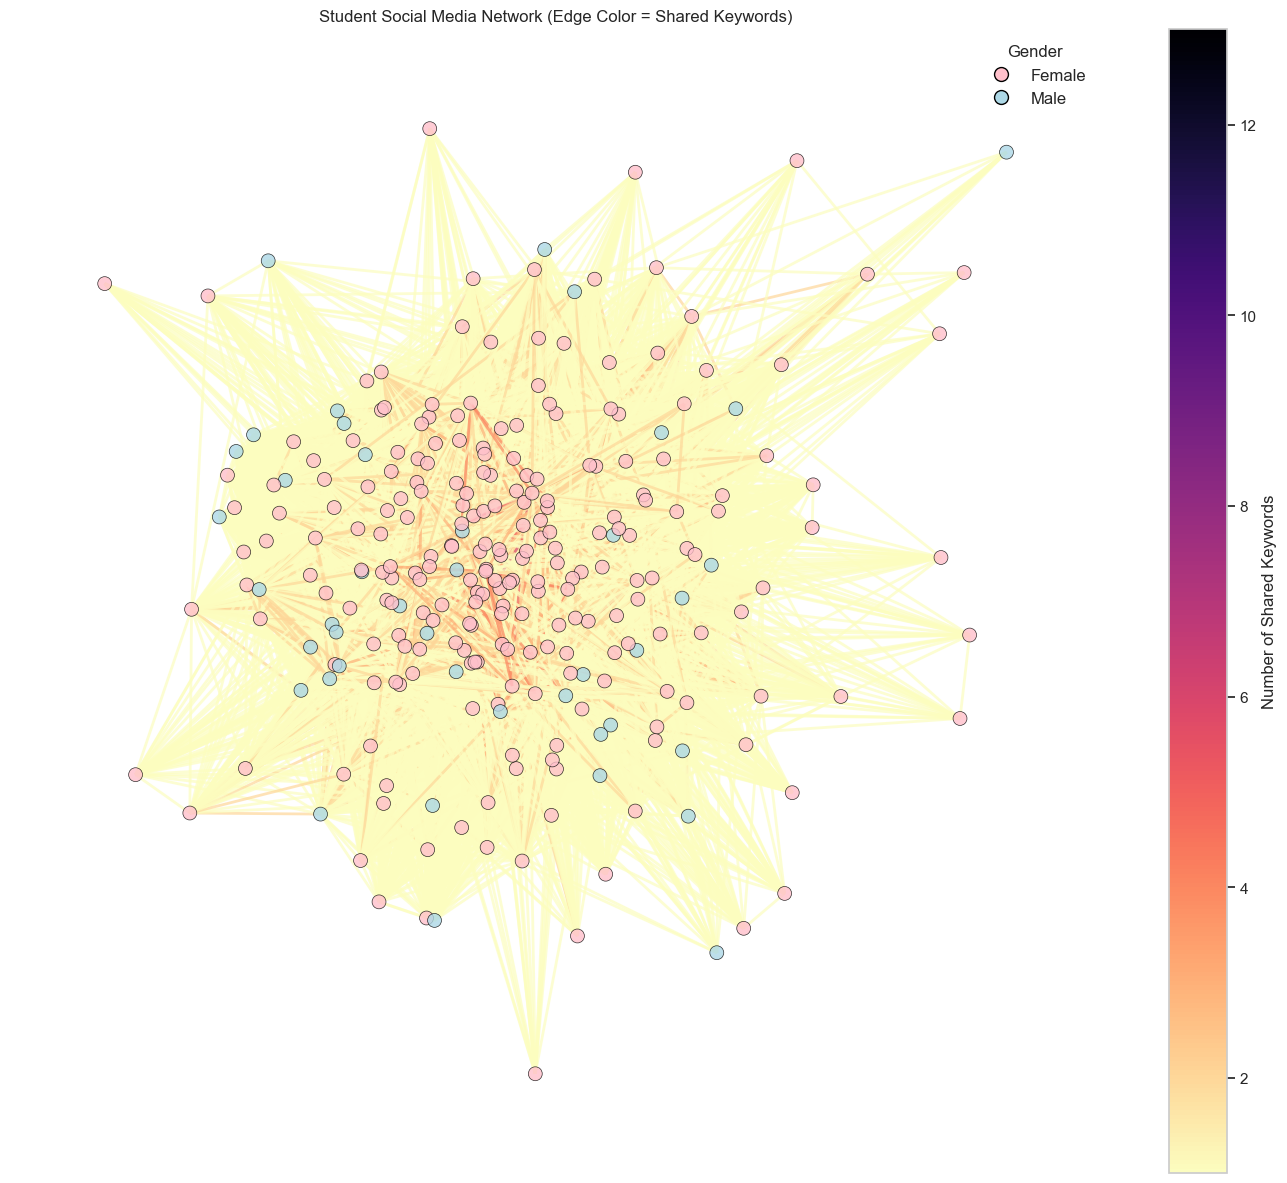

In [136]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

df = pd.read_csv("cleaned_students_data.csv")
sample_df = df.sample(n=300, random_state=42)

# Extract keyword columns from the dataset
meta_cols = ['gradyear', 'gender', 'age', 'NumberOffriends']
keyword_cols = [col for col in sample_df.columns if col not in meta_cols]

for col in keyword_cols:
    # Attempt to convert to numeric, coercing errors to NaN
    sample_df[col] = pd.to_numeric(sample_df[col], errors='coerce')
    # Fill NaN with 0, as we want 0 for "not present"
    sample_df[col] = sample_df[col].fillna(0)
    # Ensure they are binary (1 if > 0, else 0)
    sample_df[col] = sample_df[col].apply(lambda x: 1 if x > 0 else 0)

# Filter Out Low-Activity Users
keyword_counts = sample_df[keyword_cols].sum(axis=1)
sample_df = sample_df[keyword_counts > 0].reset_index(drop=True)

# Binary matrix: 1 if student used keyword, 0 otherwise
binary_keywords = sample_df[keyword_cols].values

# Create the graph
G = nx.Graph()
# Add nodes
for i in range(len(sample_df)):
    G.add_node(i, gender=sample_df.loc[i, 'gender'], age=sample_df.loc[i, 'age'])

# Add weighted edges based on number of shared keywords
for i in range(len(binary_keywords)):
    for j in range(i + 1, len(binary_keywords)):
        weight = np.dot(binary_keywords[i], binary_keywords[j])
        if weight > 0:
            G.add_edge(i, j, weight=weight)

fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)

# Node colors based on gender
node_colors = ['pink' if G.nodes[node]['gender'] == 'F' else 'lightblue' for node in G.nodes()]

# Extract edge weights and normalize for coloring
edges = G.edges()
weights = np.array([G[u][v]['weight'] for u, v in edges])
norm = mcolors.Normalize(vmin=weights.min(), vmax=weights.max())
cmap = cm.magma_r
edge_colors = [cmap(norm(w)) for w in weights]

# Draw nodes and edges
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    edgecolors='black',
    linewidths=0.5,
    node_size=100,
    alpha=0.8,
    ax=ax
)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7, width=2, ax=ax)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(weights)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Number of Shared Keywords")

# Add legend for gender
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='pink', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='lightblue', markersize=10, markeredgecolor='black')
]
ax.legend(handles=legend_elements, title='Gender', loc='upper right', fontsize='medium', frameon=False)
ax.set_title("Student Social Media Network (Edge Color = Shared Keywords)")
ax.axis('off')
plt.tight_layout()
plt.show()

C:\Users\amits\AppData\Local\Temp\ipykernel_25244\186006927.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.95])


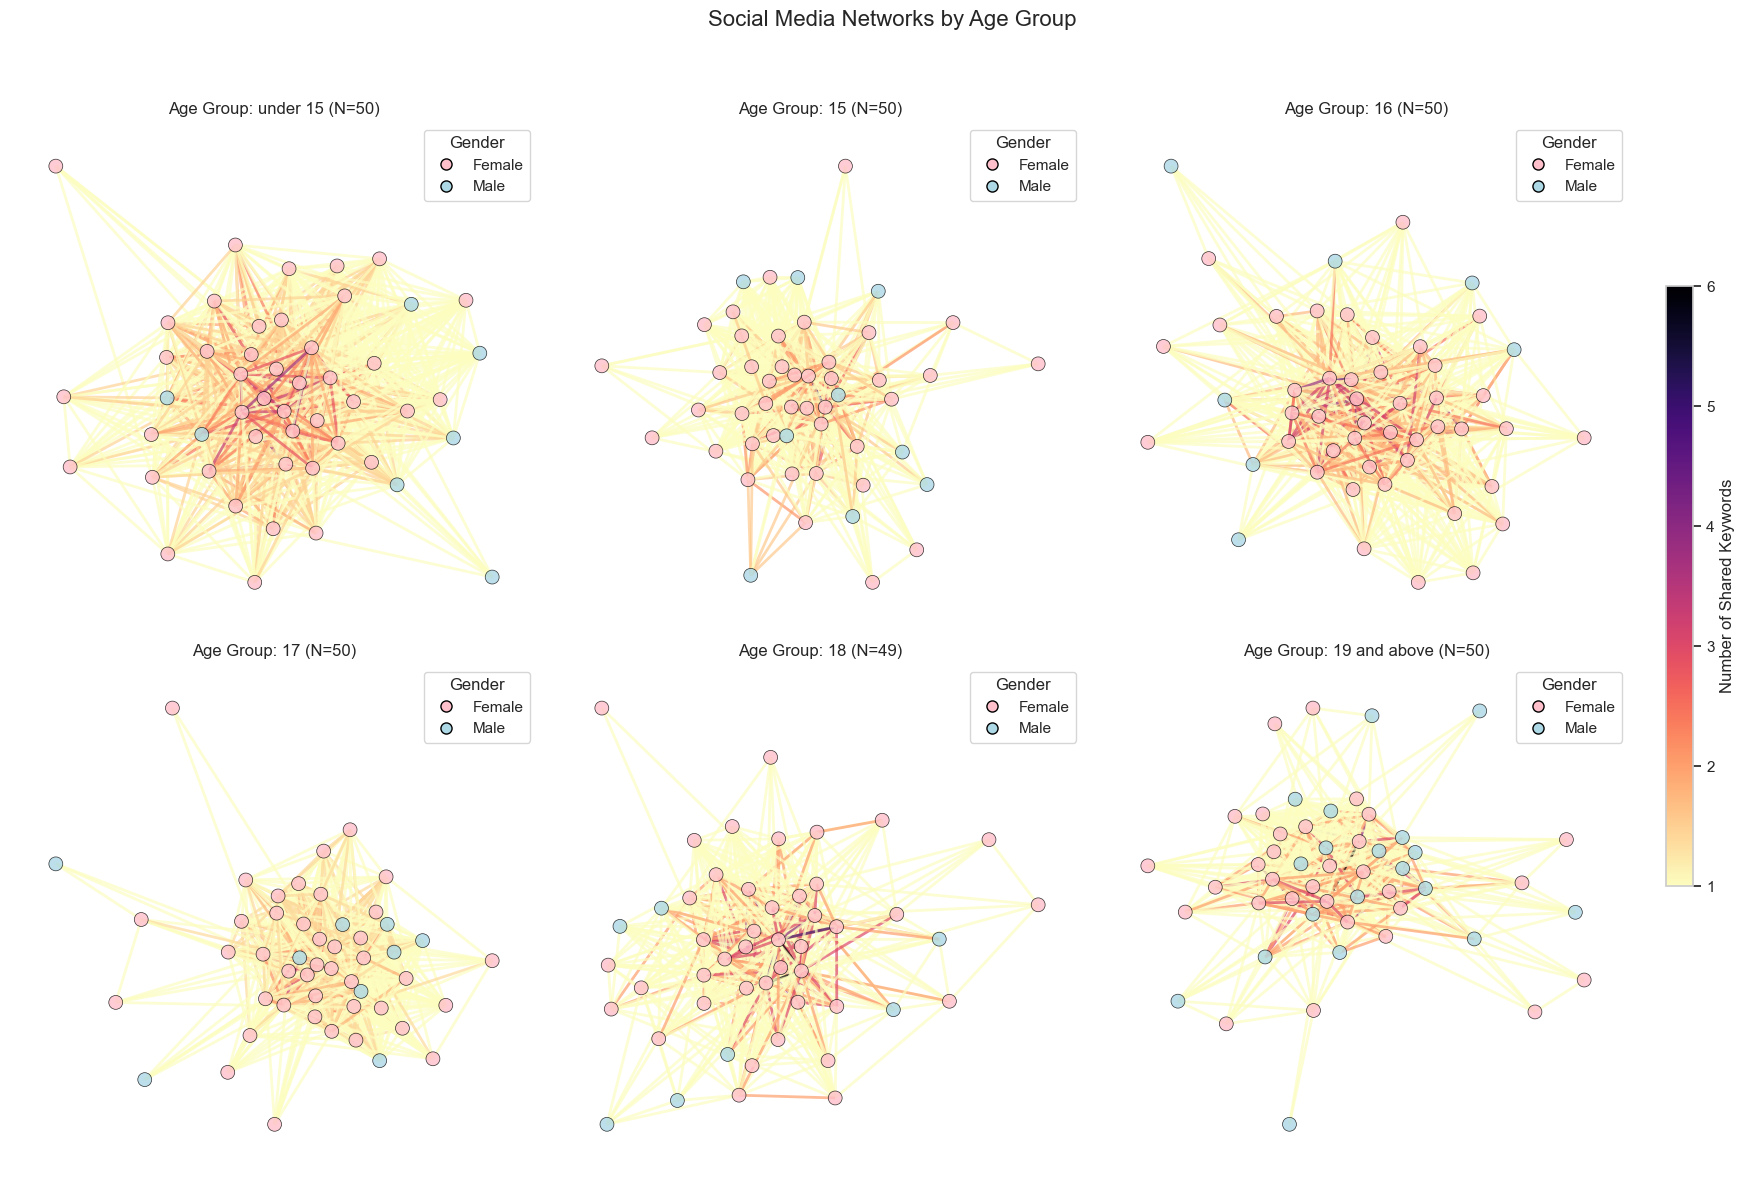

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

df = pd.read_csv("cleaned_students_data.csv")

# Define meta columns - columns that are not keywords
meta_cols = ['gradyear', 'gender', 'age', 'NumberOffriends']
all_keyword_cols = [col for col in df.columns if col not in meta_cols]

for col in all_keyword_cols:
    # Attempt to convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill NaN with 0, as we want 0 for "not present"
    df[col] = df[col].fillna(0)
    # Ensure they are binary (1 if > 0, else 0). This also handles cases where
    # the original data might have non-binary numerical values if they were keywords.
    df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)

# Define age group bins and labels using the full dataset
bins = [0, 15, 16, 17, 18, 19, 30]
labels = ['under 15', '15', '16', '17', '18', '19 and above']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
cmap = cm.magma_r

for idx, age_group in enumerate(labels):
    ax = axes[idx]
    group_df = df[df['age_group'] == age_group].copy()

    if group_df.empty:
        ax.set_title(f"{age_group} (No Data)")
        ax.axis('off')
        continue

    # Filter out users with no keywords from this specific age group
    # Use the 'all_keyword_cols' list to ensure consistency
    keyword_counts = group_df[all_keyword_cols].sum(axis=1)
    group_df = group_df[keyword_counts > 0]

    # Sample users within the group if there are too many
    group_df = group_df.sample(n=min(len(group_df), 50), random_state=42).reset_index(drop=True)
    if group_df.empty:
        ax.set_title(f"{age_group} (No Active Users after sampling)")
        ax.axis('off')
        continue

    # Binary keyword matrix
    binary_keywords = group_df[all_keyword_cols].values

    # Set threshold
    threshold = 1  # Only keep edges with 1 or more shared keywords

    # Create a new empty graph
    G = nx.Graph()
    valid_edges = []
    valid_nodes = set()

    # Add edges with weight >= threshold
    for i in range(len(binary_keywords)):
        for j in range(i + 1, len(binary_keywords)):
            weight = np.dot(binary_keywords[i], binary_keywords[j])
            if weight >= threshold:
                valid_edges.append((i, j, weight))
                valid_nodes.update([i, j])

    # Add valid nodes to the graph
    for node_idx in valid_nodes:  # Renamed 'node' to 'node_idx' to avoid confusion with G.nodes()
        G.add_node(node_idx, gender=group_df.loc[node_idx, 'gender'], age=group_df.loc[node_idx, 'age'])

    # Add valid edges to the graph
    for u, v, weight in valid_edges:
        G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    node_colors = ['pink' if G.nodes[node]['gender'] == 'F' else 'lightblue' for node in G.nodes()]

    # Normalize edge weights
    if G.number_of_edges() > 0:
        weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
        norm = mcolors.Normalize(vmin=weights.min(), vmax=weights.max())
        edge_colors = [cmap(norm(w)) for w in weights]
    else:
        edge_colors = []
        # If no edges, ensure 'norm' is defined for the colorbar, even if it's a dummy
        norm = mcolors.Normalize(0, 1)


    # Draw graph
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        edgecolors='black',
        linewidths=0.5,
        node_size=100,
        alpha=0.8,
        ax=ax
    )
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7, width=2, ax=ax)

    ax.set_title(f"Age Group: {age_group} (N={G.number_of_nodes()})") # Added node count for clarity
    ax.axis('off')

    # Add gender legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='pink', markersize=8, markeredgecolor='black'),
        Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='lightblue', markersize=8, markeredgecolor='black')
    ]
    ax.legend(handles=legend_elements, title='Gender', loc='upper right', frameon=True)

# Add shared colorbar
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.93, 0.25, 0.015, 0.5])

# Ensure 'weights' and 'norm' are correctly handled for the colorbar, even if the last graph was empty
# Use a placeholder if no edges were ever drawn across all subplots
if 'weights' not in locals() or len(weights) == 0:
    sm = cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(0, 1))
    sm.set_array(np.array([0, 1]))
else:
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(weights) # Use the weights from the last successful graph, or a dummy

cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Number of Shared Keywords")

plt.suptitle("Social Media Networks by Age Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.show()

Box plot    
שמוכיח שקיימות קשתות בעלות משקל גבוה,    
כלומר קיימים תלמידים עם כמה תחומי עניין משותפים

Maximum Edge Weight: 6


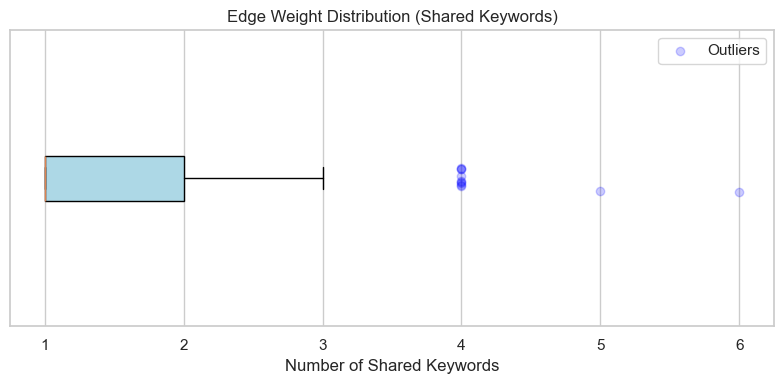

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("Maximum Edge Weight:", weights.max())

# Convert weights to DataFrame
weights_df = pd.DataFrame({'weights': weights})

# Compute IQR and outliers
Q1 = weights_df['weights'].quantile(0.25)
Q3 = weights_df['weights'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (weights_df['weights'] < (Q1 - 1.5 * IQR)) | (weights_df['weights'] > (Q3 + 1.5 * IQR))
outliers = weights_df[outlier_condition]['weights']

plt.figure(figsize=(8, 4))

# Box plot
plt.boxplot(weights, vert=False, patch_artist=True,
            showfliers=False,
            boxprops=dict(facecolor='lightblue'))

# Scatter outliers slightly above the box (y=1)
jitter_y = np.random.uniform(0.95, 1.05, size=len(outliers))
plt.scatter(outliers, jitter_y, color='blue', alpha=0.2, label="Outliers")

plt.xlabel("Number of Shared Keywords")
plt.title("Edge Weight Distribution (Shared Keywords)")
plt.yticks([])  # Hide y-axis ticks, they're meaningless here
plt.legend()
plt.tight_layout()
plt.show()


שילוב התייחסות לכמויות השימוש בכל מילת מפתח בחישוב המשקלים של הקשתות

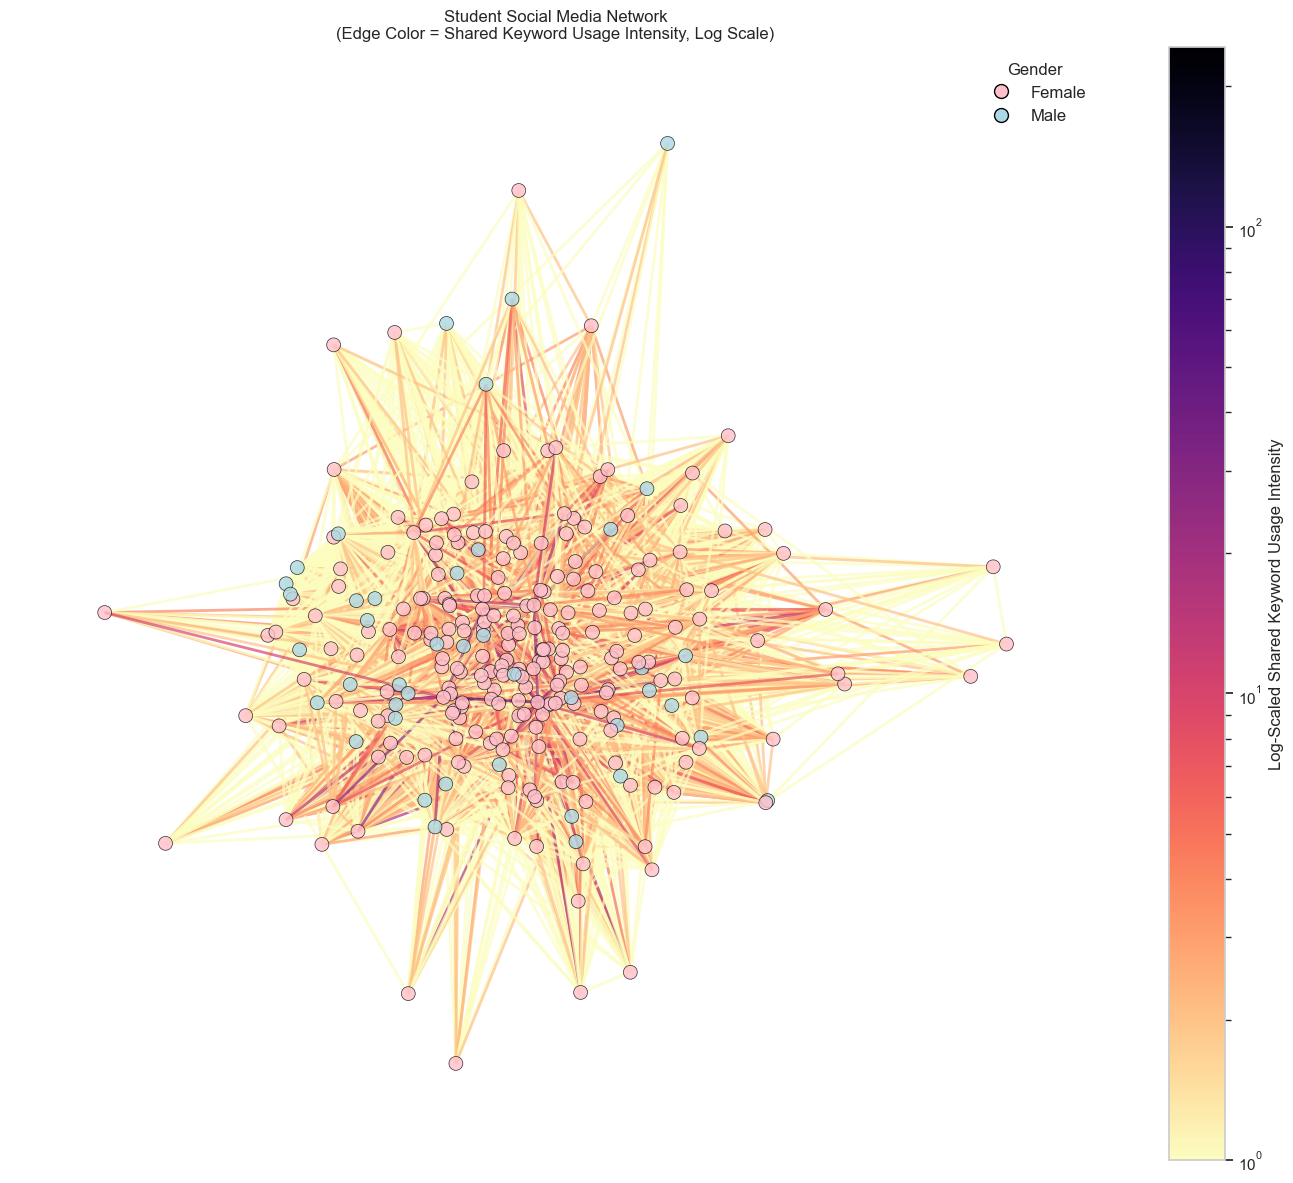

In [138]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

df = pd.read_csv("cleaned_students_data.csv")

# Extract keyword columns before sampling, to ensure we get all of them
meta_cols = ['gradyear', 'gender', 'age', 'NumberOffriends']
all_keyword_cols = [col for col in df.columns if col not in meta_cols]


# This ensures that any subset (like sample_df) will also have numeric keyword columns
for col in all_keyword_cols:
    # Attempt to convert to numeric, coercing errors to NaN for non-numeric values
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill NaN values with 0. This treats missing\non-numeric keyword data as "not used".
    df[col] = df[col].fillna(0)

# Sample from the data
sample_df = df.sample(n=300, random_state=42).copy() # Copying to avoid SettingWithCopyWarning

# Make sure keyword_cols refers to the correct columns in the sampled dataframe
# (which are now guaranteed to be numeric)
keyword_cols = [col for col in sample_df.columns if col not in meta_cols]

# Filter out students with no keyword activity
# This sum will work correctly because keyword_cols are numeric
keyword_counts = sample_df[keyword_cols].sum(axis=1)
sample_df = sample_df[keyword_counts > 0].reset_index(drop=True)

# Use keyword usage counts
keyword_usage = sample_df[keyword_cols].values  # [num_students, num_keywords]

# Create the graph
G = nx.Graph()
# Add nodes
for i in range(len(sample_df)):
    G.add_node(i, gender=sample_df.loc[i, 'gender'], age=sample_df.loc[i, 'age'])

# Add edges based on weighted dot product
for i in range(len(keyword_usage)):
    for j in range(i + 1, len(keyword_usage)):
        weight = np.dot(keyword_usage[i], keyword_usage[j])
        if weight > 0:
            G.add_edge(i, j, weight=weight)

fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)

# Node colors by gender
node_colors = ['pink' if G.nodes[node]['gender'] == 'F' else 'lightblue' for node in G.nodes()]

# Extract and log-normalize edge weights, to highlight the differences in weight values.
edges = G.edges()
weights = np.array([G[u][v]['weight'] for u, v in edges])

# Ensure weights.min() is not zero or negative for LogNorm.
# Use logarithmic normalization to enhance color contrast.
# If min weight can be 0 or very small, use 1 or a slightly larger value as min for LogNorm.
if len(weights) > 0 and weights.min() > 0:
    norm = mcolors.LogNorm(vmin=weights.min(), vmax=weights.max())
else:
    # Handle cases where there are no edges or all weights are 0, which would cause an error with LogNorm.
    norm = mcolors.Normalize(vmin=0, vmax=1)  # A dummy norm
    print("Warning: No positive edge weights found for LogNorm. Using linear normalization.")

cmap = cm.magma_r
edge_colors = [cmap(norm(w)) for w in weights]

# Draw nodes and edges
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    edgecolors='black',
    linewidths=0.5,
    node_size=100,
    alpha=0.8,
    ax=ax
)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.7, width=2, ax=ax)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(weights)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Log-Scaled Shared Keyword Usage Intensity")

# Add gender legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='pink', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='lightblue', markersize=10, markeredgecolor='black')
]
ax.legend(handles=legend_elements, title='Gender', loc='upper right', fontsize='medium', frameon=False)

ax.set_title("Student Social Media Network\n(Edge Color = Shared Keyword Usage Intensity, Log Scale)")
ax.axis('off')
plt.tight_layout()
plt.show()

# Create edges and nodes: 

In [ ]:
#load the cleaned data after preprocessing
df_clean = pd.read_csv("cleaned_students_data.csv")
df_clean.columns


Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs', 'friends_group', 'party_risk_count',
       'uses_party_risk', 'religion_count', 'talks_religion', 'sports_count'],
      dtype='object')

In [ ]:
word_columns = df_clean.columns[4:-6] 
print("\nWord columns:")
print(word_columns)


Word columns:
Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# ----- 1. Sample 1000 males + 1000 females -----
rng = 42
males = df_clean[df_clean["gender"] == "M"].sample(n=1000, random_state=rng)
females = df_clean[df_clean["gender"] == "F"].sample(n=1000, random_state=rng)
sample_df = pd.concat([males, females]).reset_index(drop=True)

# ----- 2. Define filtered interest domains -----
interest_domains = {
    "sports":    ['basketball', 'football','soccer','softball','volleyball','swimming','cheerleading','baseball','tennis','sports'],
    "music":     ['dance','band','marching','music','rock'],
    "religion":  ['god','church','jesus','bible'],
    "sexuality": ['cute','sex','sexy','hot','kissed'],
    "risk":      ['drunk','drugs','die','death'],
    "shopping":  ['hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie']
}

available = set(sample_df.columns)
filtered_domains = {d: [w for w in words if w in available] for d, words in interest_domains.items()}
all_words = sorted({w for words in filtered_domains.values() for w in words})
sample_df[all_words] = sample_df[all_words].fillna(0).astype(float)

# ----- 3. Compute shared dominant-domain words only -----
rows = []
n = len(sample_df)

print("🔍 Computing dominant domain shared-words for each student pair...")
for i in tqdm(range(n)):
    row_i = sample_df.iloc[i]
    for j in range(i + 1, n):
        row_j = sample_df.iloc[j]

        # count shared words by domain
        domain_counts = {}
        shared_words_by_domain = {}
        for d, words in filtered_domains.items():
            shared = [w for w in words if row_i[w] > 0 and row_j[w] > 0]
            if shared:
                domain_counts[d] = len(shared)
                shared_words_by_domain[d] = shared

        if not domain_counts:
            continue  # no shared words in any domain

        # find dominant domain with most shared words
        dominant_domain = max(domain_counts, key=domain_counts.get)
        shared_words = shared_words_by_domain[dominant_domain]
        weight = len(shared_words)

        # ⛔ skip if dominant domain has no actual shared words
        if weight == 0:
            continue

        # ✅ add edge only for dominant domain
        rows.append({
            "source": i,
            "target": j,
            "weight": weight,
            "dominant_domain": dominant_domain,
            "shared_words": "|".join(shared_words)
        })

# ----- 4. Build dataframes and save -----
edges_df = pd.DataFrame(rows)

nodes_df = pd.DataFrame({
    "id": np.arange(n),
    "gradyear": sample_df["gradyear"].values,
    "gender": sample_df["gender"].values,
    "age":    sample_df.get("age"),
    "friends": sample_df.get("NumberOffriends"),
    "interests": sample_df.apply(
        lambda row: "|".join(
            d for d, words in filtered_domains.items() if row[words].sum() > 0
        ), axis=1
    )
})

edges_df.to_csv("EDGES_dominant_words.csv", index=False)
nodes_df.to_csv("NODES.csv", index=False)

print("✅ Done! Saved: EDGES_dominant_words.csv & NODES.csv")


🔍 Computing dominant domain shared-words for each student pair...


100%|██████████| 2000/2000 [06:20<00:00,  5.26it/s] 


✅ Done! Saved: EDGES_dominant_words.csv & NODES.csv


# Load from the nodes and edges created for domain

#### Network of edges by shared interst category

In [ ]:
# 1) Load nodes / edges
# -------------------------------
nodes_df = pd.read_csv("NODES.csv")
edges_df = pd.read_csv("EDGES_dominant_words.csv")
print("Nodes shape:", nodes_df.shape)

Nodes shape: (2000, 6)


C:\Users\Yuval Margolin\AppData\Local\Temp\ipykernel_25564\1893159559.py:34: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G_full.nodes(), min(300, len(G_full.nodes())))


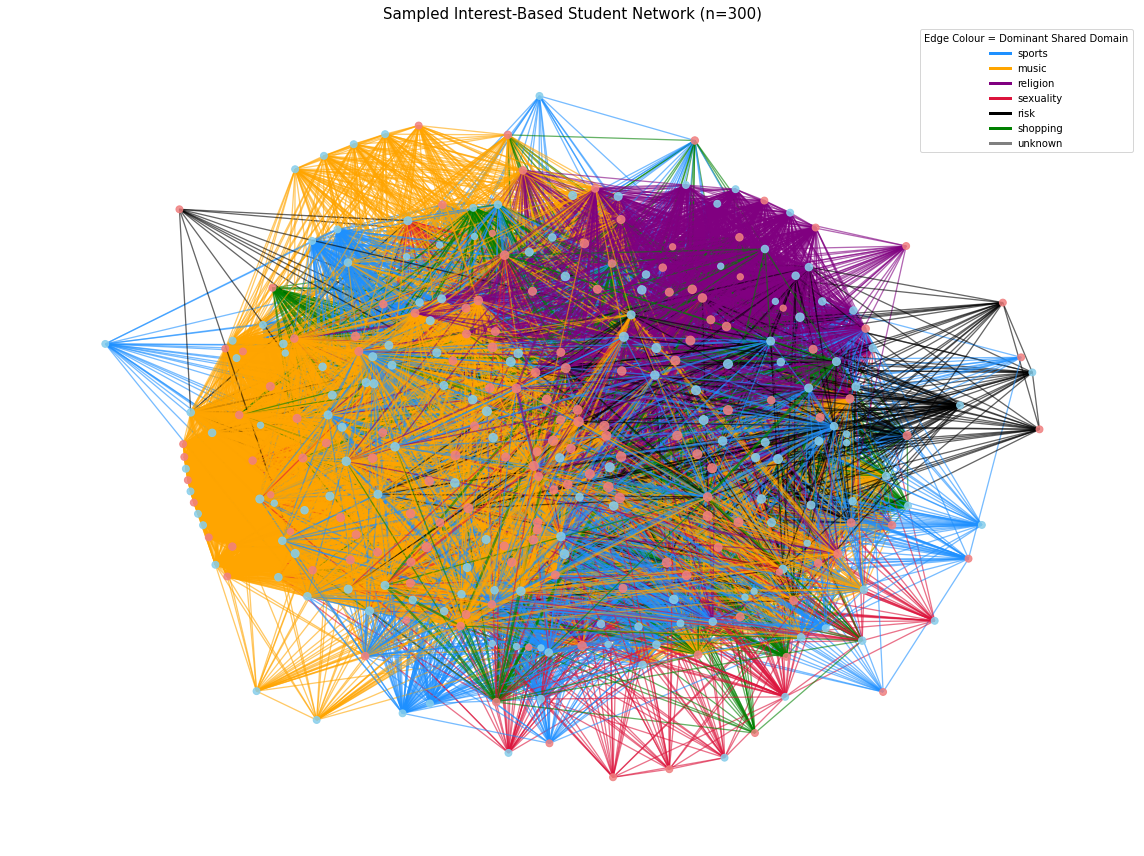

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


# -------------------------------
# 2) Rebuild the graph with attributes
# -------------------------------
G_full = nx.Graph()

# Add nodes
for _, row in nodes_df.iterrows():
    G_full.add_node(
        row["id"],
        gender   = row["gender"],
        age      = row.get("age"),
        friends  = row.get("friends"),
        interests= row["interests"].split("|") if pd.notna(row["interests"]) else []
    )

# Add edges
for _, row in edges_df.iterrows():
    if row["source"] in G_full.nodes and row["target"] in G_full.nodes:
        G_full.add_edge(
            row["source"], row["target"],
            weight          = row["weight"],
            dominant_domain = row["dominant_domain"]
        )

# -------------------------------
# 3) Sample 300 nodes and their subgraph
# -------------------------------
sampled_nodes = random.sample(G_full.nodes(), min(300, len(G_full.nodes())))
G = G_full.subgraph(sampled_nodes).copy()

# -------------------------------
# 4) Define colors
# -------------------------------
domain_colors = {
    "sports": "dodgerblue",
    "music": "orange",
    "religion": "purple",
    "sexuality": "crimson",
    "risk": "black",
    "shopping": "green",
    "unknown": "gray"
}

edge_colors = [
    domain_colors.get(d["dominant_domain"], "gray")
    for _, _, d in G.edges(data=True)
]

gender_colors = {"M": "skyblue", "F": "lightcoral", "other": "lightgray"}
node_colors = [
    gender_colors.get(G.nodes[n].get("gender"), "lightgray")
    for n in G.nodes
]

node_sizes = [40 + 8 * len(G.nodes[n].get("interests", [])) for n in G.nodes]
edge_widths = [0.3 + d["weight"] for _, _, d in G.edges(data=True)]

# -------------------------------
# 5) Draw sampled network with white background
# -------------------------------
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(16, 12), facecolor='white')
plt.gca().set_facecolor('white')

nx.draw_networkx_nodes(G, pos,
                       node_color=node_colors,
                       node_size=node_sizes,
                       alpha=0.85)
nx.draw_networkx_edges(G, pos,
                       edge_color=edge_colors,
                       width=edge_widths,
                       alpha=0.6)

# Legend
for dom, col in domain_colors.items():
    plt.plot([], [], color=col, linewidth=3, label=dom)
plt.legend(title="Edge Colour = Dominant Shared Domain", loc="upper right")
 #Add legend for gender
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='pink', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='lightblue', markersize=10, markeredgecolor='black')
]
plt.title("Sampled Interest-Based Student Network (n=300)", fontsize=15)
plt.axis("off")
plt.tight_layout()
plt.savefig("student_interest_network_sample_300.png", dpi=300, facecolor='white')
plt.show()


# domain SPECIFIC Networks

In [ ]:
"""
NETWORK BUILDING SCRIPT
=======================

This script:
1. Draws a manageable random sample from the 10 000-student dataset.
2. Builds separate networks (edges + nodes) for the research questions:
   • “party-risk” words (parties / sexuality / unsafe behaviour)  
   • religion words  
   • death-risk words  
3. Saves each network to two CSV files:
   EDGES_<network>.csv ,  NODES_<network>.csv
"""

import pandas as pd
import numpy as np
from tqdm import tqdm

# ------------------------------------------------------------------
# 0. PARAMETERS  ----------------------------------------------------
# ------------------------------------------------------------------
RNG_SEED        = 42          # reproducible sampling
SAMPLE_SIZE     = 2000        # manageable yet representative
MIN_SHARED_WORD = 1           # edge threshold (≥1 shared word)

# ------------------------------------------------------------------
# 1. LOAD DATA  -----------------------------------------------------
# ------------------------------------------------------------------
# df_clean must already be loaded in memory or read from disk:
# df_clean = pd.read_csv("df_clean.csv")

# ------------------------------------------------------------------
# 2. WORD GROUPS FOR THE RESEARCH QUESTIONS -------------------------
# ------------------------------------------------------------------
word_groups = {
    "party_risk": [
        "cute", "sex", "sexy", "hot", "kissed",
        "drunk", "drugs"
    ],
    "religion": [
        "god", "church", "jesus", "bible"
    ],
    "sports": [
        "basketball", "football", "soccer", "softball",
        "volleyball", "swimming", "cheerleading",
        "baseball", "tennis", "sports"
    ],
    "death_risk": [
        "die", "death", "drugs", "drunk"
    ],
    "shopping": [
        "hair", "dress", "blonde", "mall",
        "shopping", "clothes", "hollister", "abercrombie"
    ]
}

# retain only words actually present in the dataframe
available_cols = set(df_clean.columns)
word_groups = {
    k: [w for w in words if w in available_cols]
    for k, words in word_groups.items()
}

# build flat list of used word columns
all_words = sorted({w for words in word_groups.values() for w in words})

# ensure metadata columns are retained
required_meta = ["age", "gender", "NumberOffriends", "gradyear"]
meta_cols = [col for col in required_meta if col in df_clean.columns]
used_cols = list(set(all_words + meta_cols))

# draw a random sample of students and retain necessary columns
sample_df = df_clean[used_cols].sample(n=min(SAMPLE_SIZE, len(df_clean)),
                                       random_state=RNG_SEED).reset_index(drop=True)

# convert word columns to binary presence matrix (0 or 1)
sample_df[all_words] = (
    sample_df[all_words].apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)
)

# ------------------------------------------------------------------
# 3. FUNCTION TO BUILD ONE NETWORK  ---------------------------------
# ------------------------------------------------------------------
def build_network(label: str, words: list[str], min_shared: int = 1):
    """
    Build edge / node dataframes for a specific word list.
    Edge weight = number of *distinct* shared words from this list.
    """
    if not words:
        print(f"[{label}] skipped (no words found in dataset).")
        return

    B = (sample_df[words] > 0).values.astype(int)
    n = B.shape[0]

    print(f"[{label}] computing shared-word matrix...")
    shared = B @ B.T
    np.fill_diagonal(shared, 0)

    r, c = np.triu_indices(n, k=1)
    mask = shared[r, c] >= min_shared
    r, c = r[mask], c[mask]

    edges = pd.DataFrame({
        "source": r,
        "target": c,
        "weight": shared[r, c],
        "word_group": label
    })

    nodes = pd.DataFrame({
        "id"       : np.arange(n),
        "age"      : sample_df.get("age"),
        "gender"   : sample_df.get("gender"),
        "friends"  : sample_df.get("NumberOffriends"),
        "gradyear" : sample_df.get("gradyear")
    })

    # save to CSV
    edges.to_csv(f"EDGES_{label}.csv", index=False)
    nodes.to_csv(f"NODES_{label}.csv", index=False)
    print(f"[{label}] → saved  EDGES_{label}.csv  &  NODES_{label}.csv")

# ------------------------------------------------------------------
# 4. BUILD ALL REQUESTED NETWORKS  ----------------------------------
# ------------------------------------------------------------------
for label, words in word_groups.items():
    build_network(label, words, min_shared=MIN_SHARED_WORD)


[party_risk] computing shared-word matrix...
[party_risk] → saved  EDGES_party_risk.csv  &  NODES_party_risk.csv
[religion] computing shared-word matrix...
[religion] → saved  EDGES_religion.csv  &  NODES_religion.csv
[sports] computing shared-word matrix...
[sports] → saved  EDGES_sports.csv  &  NODES_sports.csv
[death_risk] computing shared-word matrix...
[death_risk] → saved  EDGES_death_risk.csv  &  NODES_death_risk.csv
[shopping] computing shared-word matrix...
[shopping] → saved  EDGES_shopping.csv  &  NODES_shopping.csv


In [ ]:
def plot_network_by_friends_and_demographics(topic: str,
                                              edges_path: str = None,
                                              nodes_path: str = None,
                                              split_by: str = "gender",
                                              sub_size: int = 500,
                                              rand_seed: int = 42):
    """
    Visualize a network for a given topic, split by gender or age (13-20).
    Each subplot shows a network for one demographic group.
    """

    # ---------- Load data ----------
    edges_path = edges_path or f"EDGES_{topic}.csv"
    nodes_path = nodes_path or f"NODES_{topic}.csv"
    nodes = pd.read_csv(nodes_path)
    edges = pd.read_csv(edges_path)

    # ---------- Sampling ----------
    rng = np.random.default_rng(rand_seed)
    sample_ids = rng.choice(nodes["id"], size=min(sub_size, len(nodes)), replace=False)
    nodes = nodes[nodes["id"].isin(sample_ids)].copy()
    edges = edges[edges["source"].isin(sample_ids) & edges["target"].isin(sample_ids)].copy()

    if edges.empty:
        print(f"[{topic}] No edges remain after sampling.")
        return

    # ---------- Column validation ----------
    if split_by not in nodes.columns:
        raise ValueError(f"'{split_by}' column not found in nodes file.")

    # Ensure friend column exists
    friends_col = "friends" if "friends" in nodes.columns else "NumberOffriends"
    if friends_col not in nodes.columns:
        raise ValueError("Missing 'friends' or 'NumberOffriends' column in nodes CSV.")

    # ---------- Special case for age ----------
    if split_by == "age":
        nodes = nodes[nodes["age"].between(13, 20, inclusive='both')]
        nodes["age"] = nodes["age"].astype(int).astype(str)

    # ---------- Group preparation ----------
    nodes[split_by] = nodes[split_by].astype(str)
    groups = sorted(nodes[split_by].dropna().unique())
    if not groups:
        raise ValueError(f"No groups found for '{split_by}'.")

    # ---------- Color scales ----------
    cmap_nodes = cm.PuRd
    cmap_edges = cm.viridis_r
    norm_nodes = mcolors.Normalize(vmin=nodes[friends_col].min(), vmax=nodes[friends_col].max())
    norm_edges = PowerNorm(gamma=0.7, vmin=edges["weight"].min(), vmax=edges["weight"].max())

    # ---------- Setup grid ----------
    ncols = min(4, len(groups))
    nrows = int(np.ceil(len(groups) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10), constrained_layout=True)
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else [axes]

    for ax, group in zip(axes, groups):
        g_nodes = nodes[nodes[split_by] == group]
        ids = set(g_nodes["id"])
        g_edges = edges[edges["source"].isin(ids) & edges["target"].isin(ids)]

        if g_edges.empty or g_nodes.empty:
            ax.set_title(f"{split_by} = {group} (no data)")
            ax.axis("off")
            continue

        G = nx.from_pandas_edgelist(g_edges, "source", "target", edge_attr="weight")
        attrs = g_nodes.set_index("id").to_dict("index")
        nx.set_node_attributes(G, attrs)
        pos = nx.spring_layout(G, seed=rand_seed)

        node_colors = [cmap_nodes(norm_nodes(G.nodes[n][friends_col])) for n in G.nodes]
        edge_weights = np.array([d["weight"] for _, _, d in G.edges(data=True)])
        edge_colors = [cmap_edges(norm_edges(w)) for w in edge_weights]
        edge_widths = 0.3 * edge_weights

        nx.draw_networkx_nodes(G, pos, ax=ax,
                               node_color=node_colors,
                               node_size=70,
                               edgecolors='black',
                               linewidths=0.4,
                               alpha=0.9)
        nx.draw_networkx_edges(G, pos, ax=ax,
                               edge_color=edge_colors,
                               width=edge_widths,
                               alpha=0.8)
        ax.set_title(f"{split_by} = {group}", fontsize=11)
        ax.axis("off")

    for ax in axes[len(groups):]:
        ax.axis("off")

    # ---------- Colorbars ----------
    sm_nodes = cm.ScalarMappable(norm=norm_nodes, cmap=cmap_nodes)
    sm_nodes.set_array([])
    fig.colorbar(sm_nodes, ax=axes, fraction=0.03, pad=0.02, label="#Friends (node color)")

    sm_edges = cm.ScalarMappable(norm=norm_edges, cmap=cmap_edges)
    sm_edges.set_array([])
    fig.colorbar(sm_edges, ax=axes, fraction=0.03, pad=0.01, label="Shared word count (edge color)")

    fig.suptitle(f"{topic.title()} network by {split_by}", fontsize=16)
    plt.show()


# Graphs nodes by friends

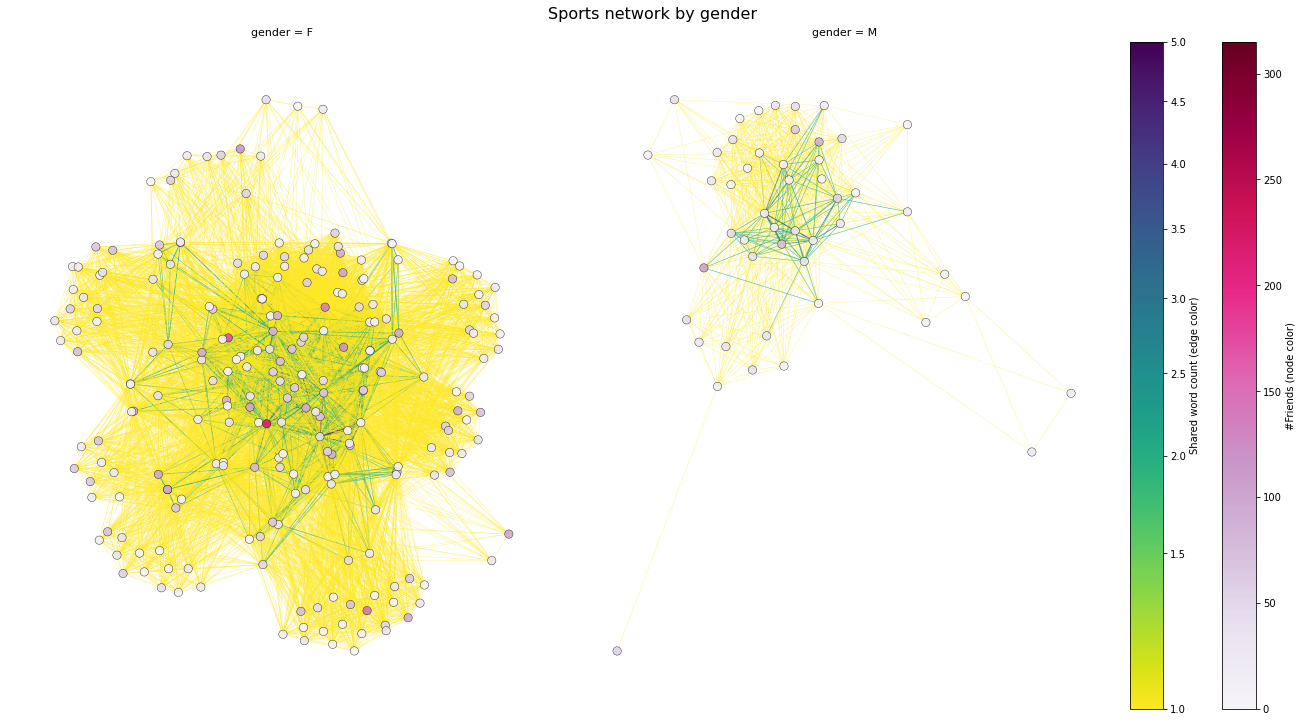

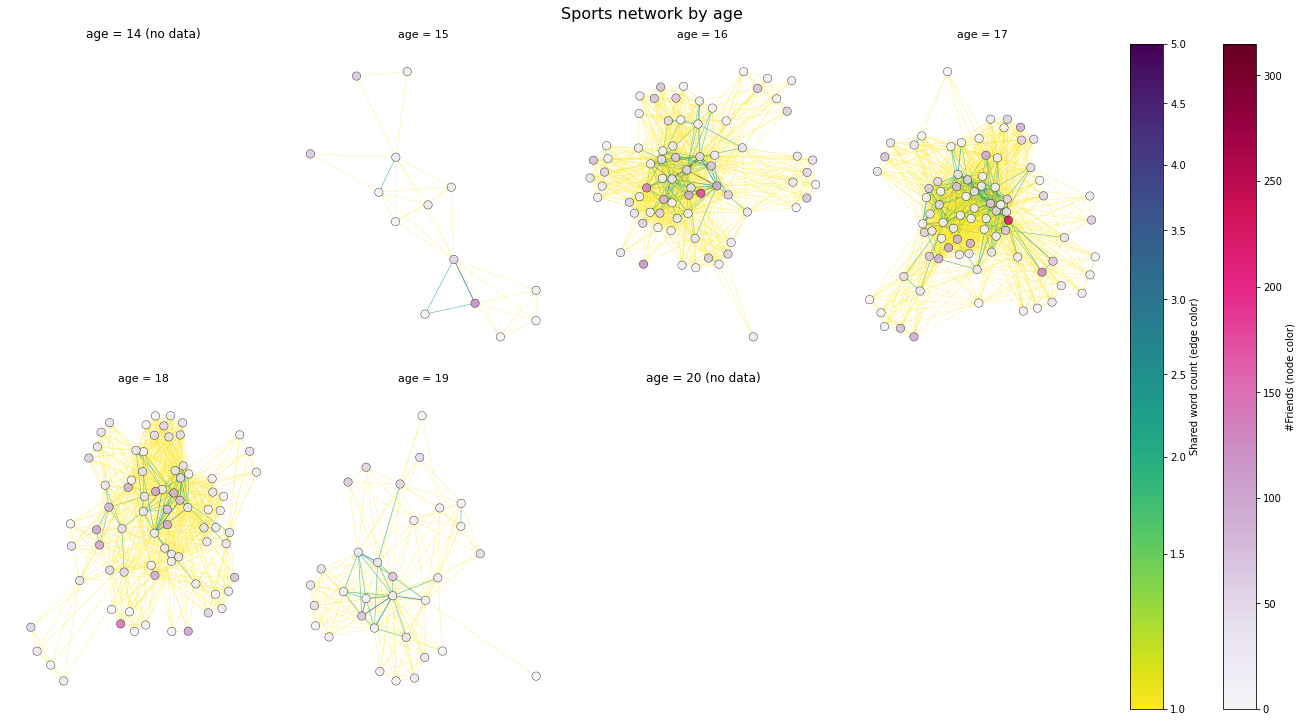

In [ ]:
plot_network_by_friends_and_demographics("sports", split_by="gender")
plot_network_by_friends_and_demographics("sports", split_by="age")



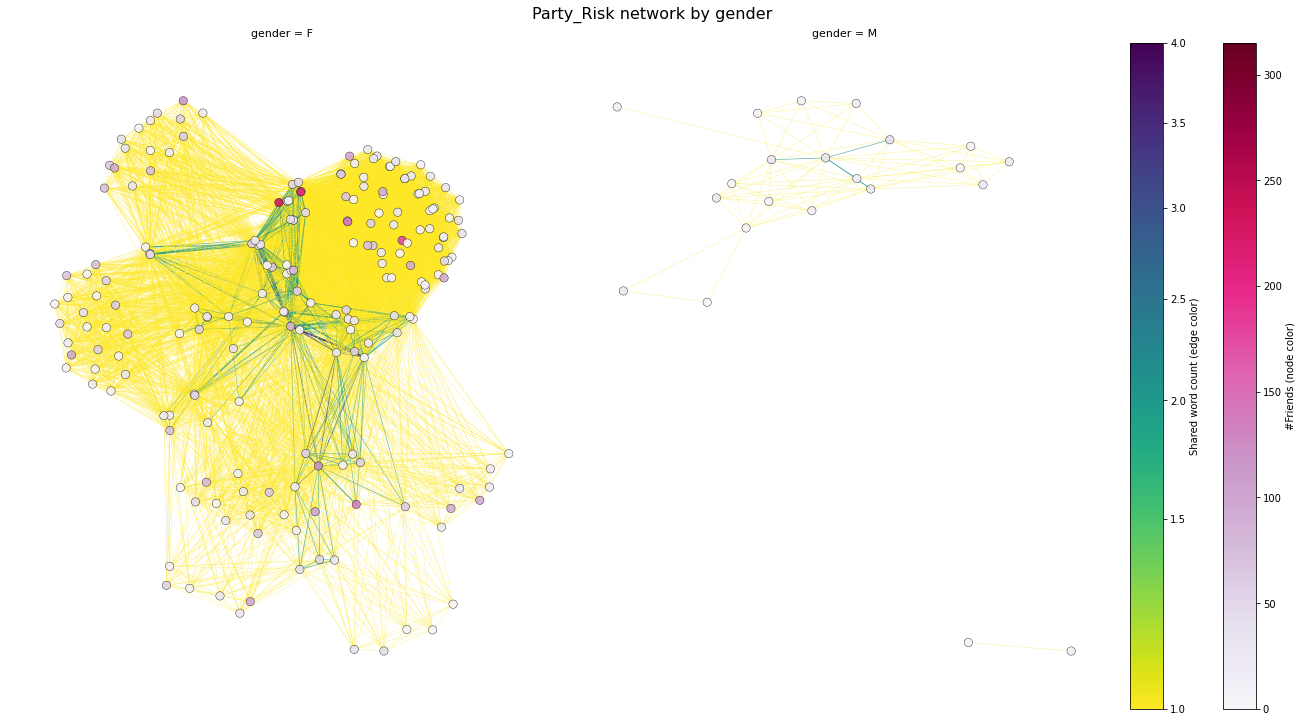

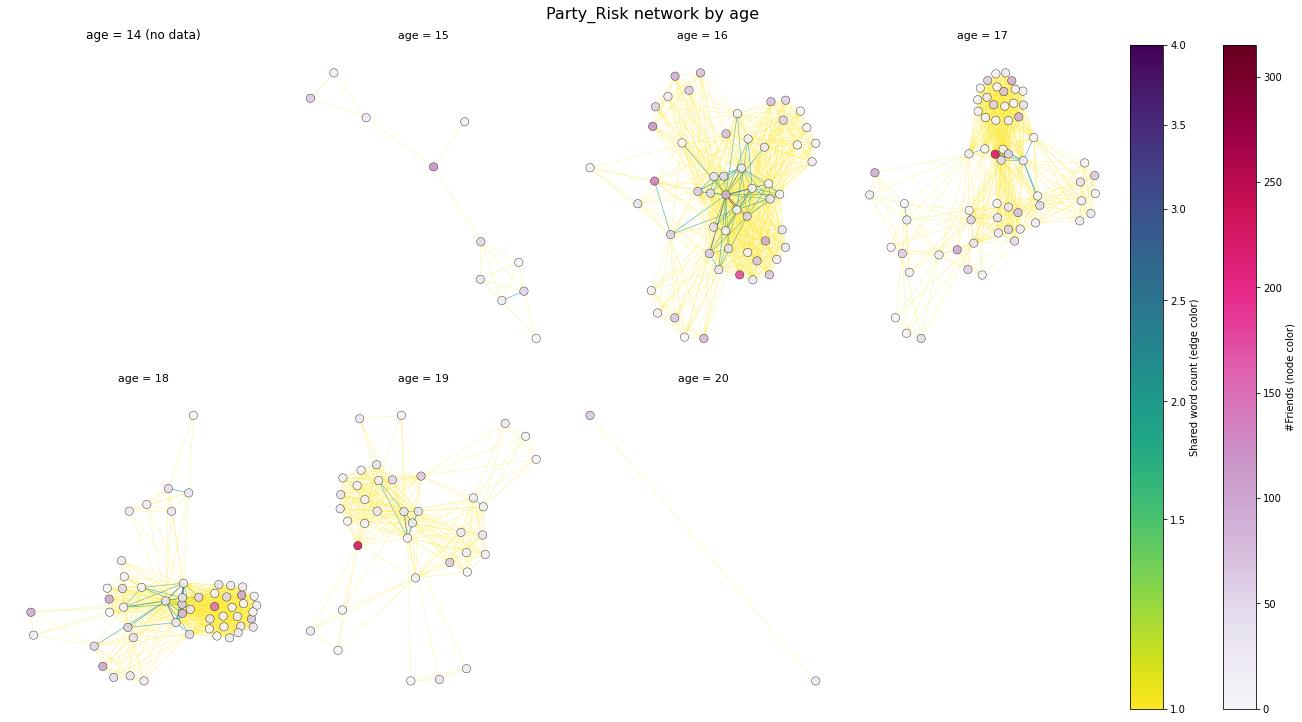

In [ ]:
plot_network_by_friends_and_demographics("party_risk", split_by="gender")
plot_network_by_friends_and_demographics("party_risk", split_by="age")

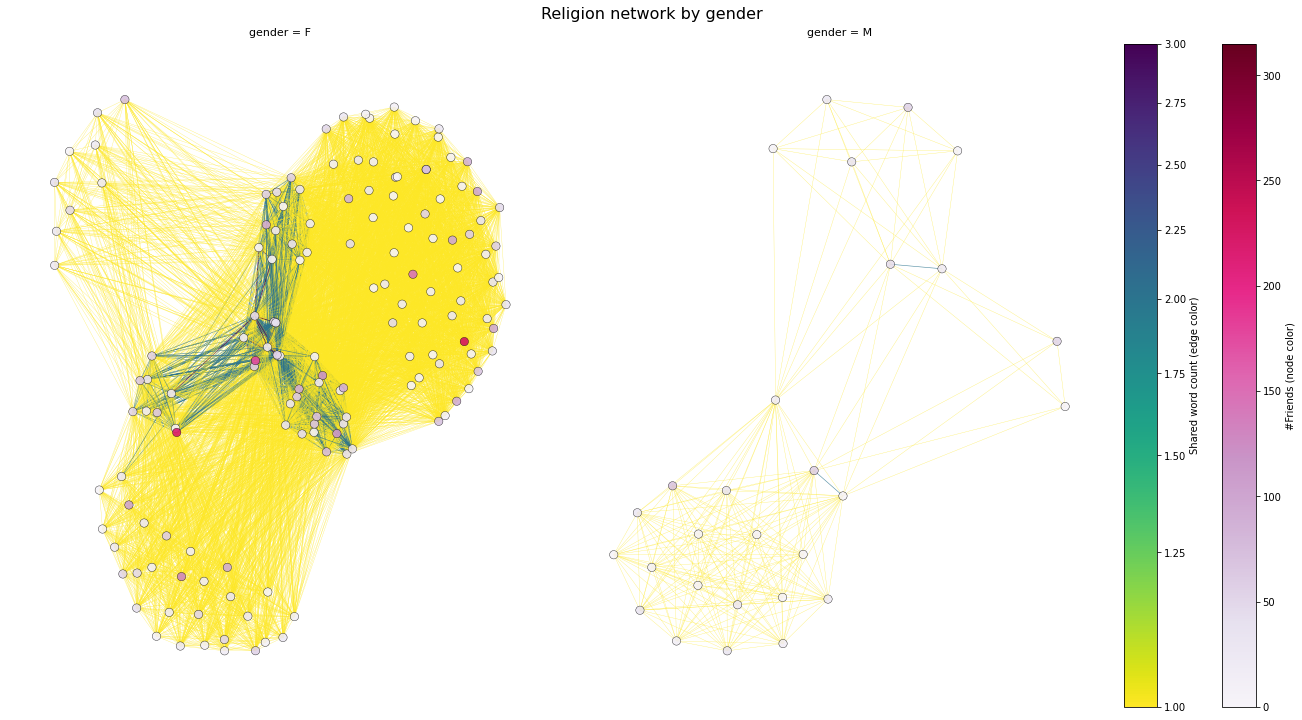

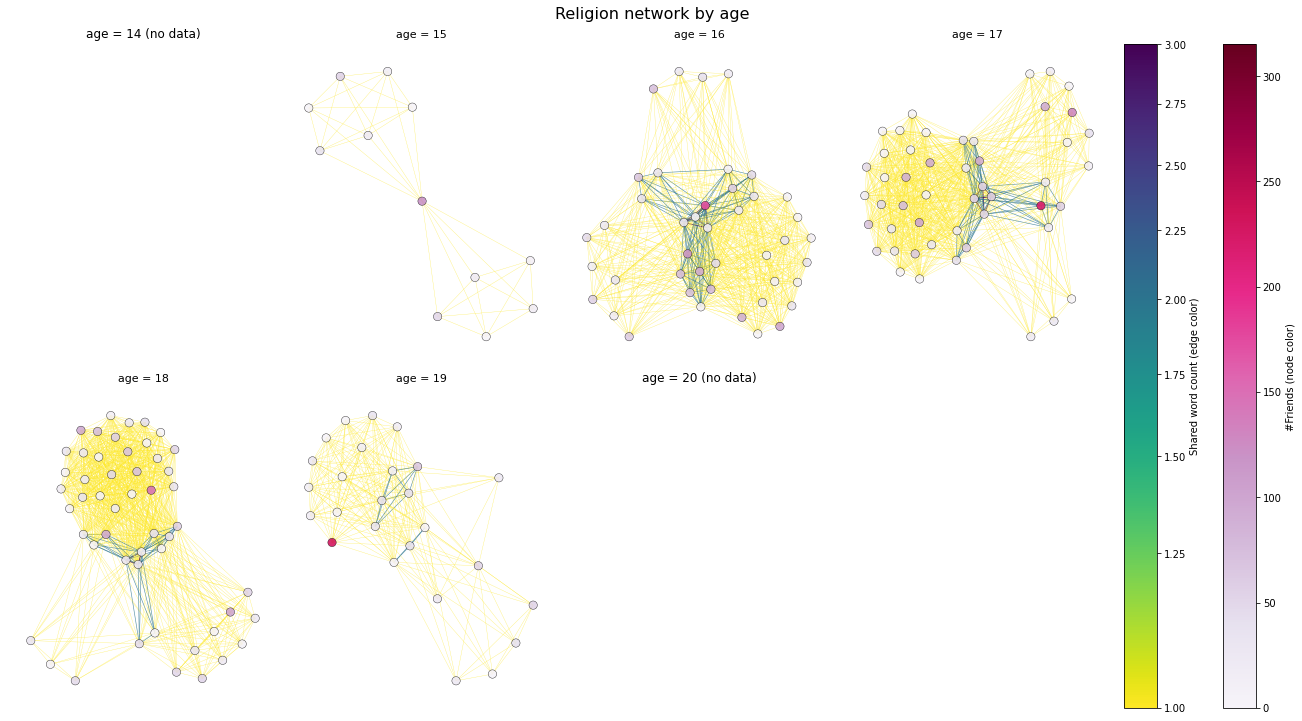

In [ ]:
plot_network_by_friends_and_demographics("religion", split_by="gender")
plot_network_by_friends_and_demographics("religion", split_by="age")

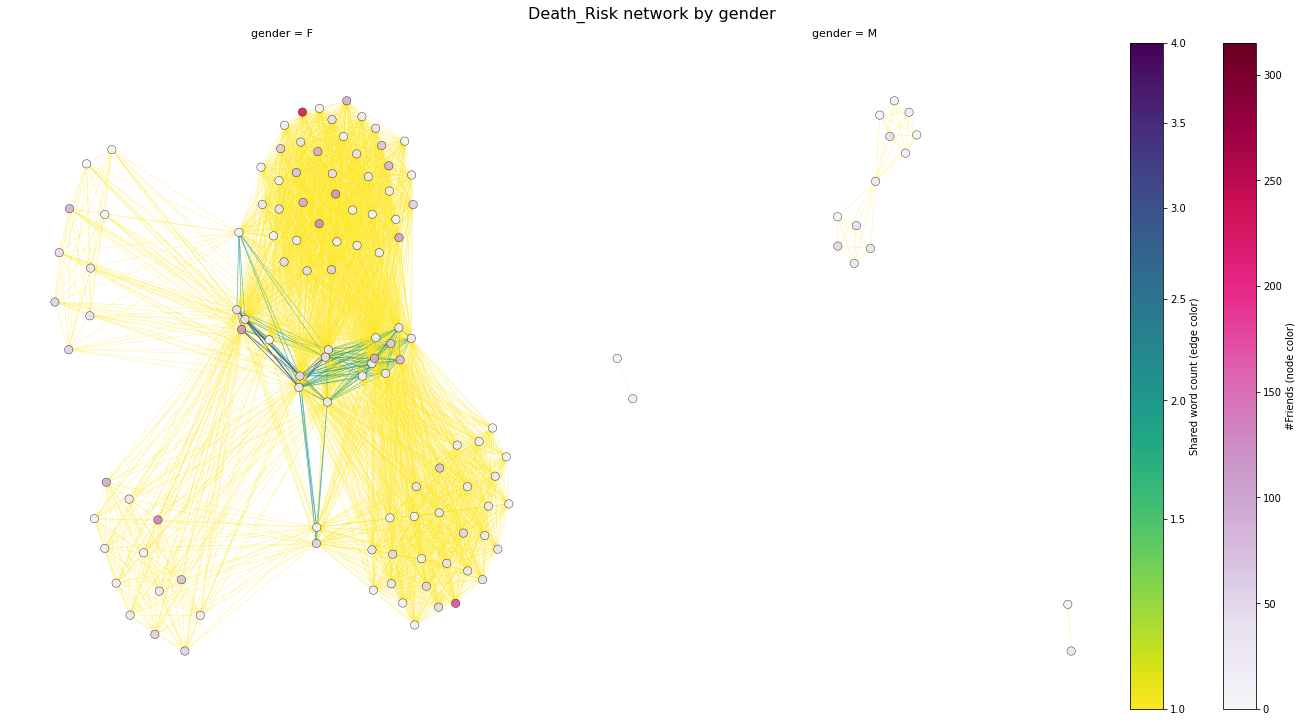

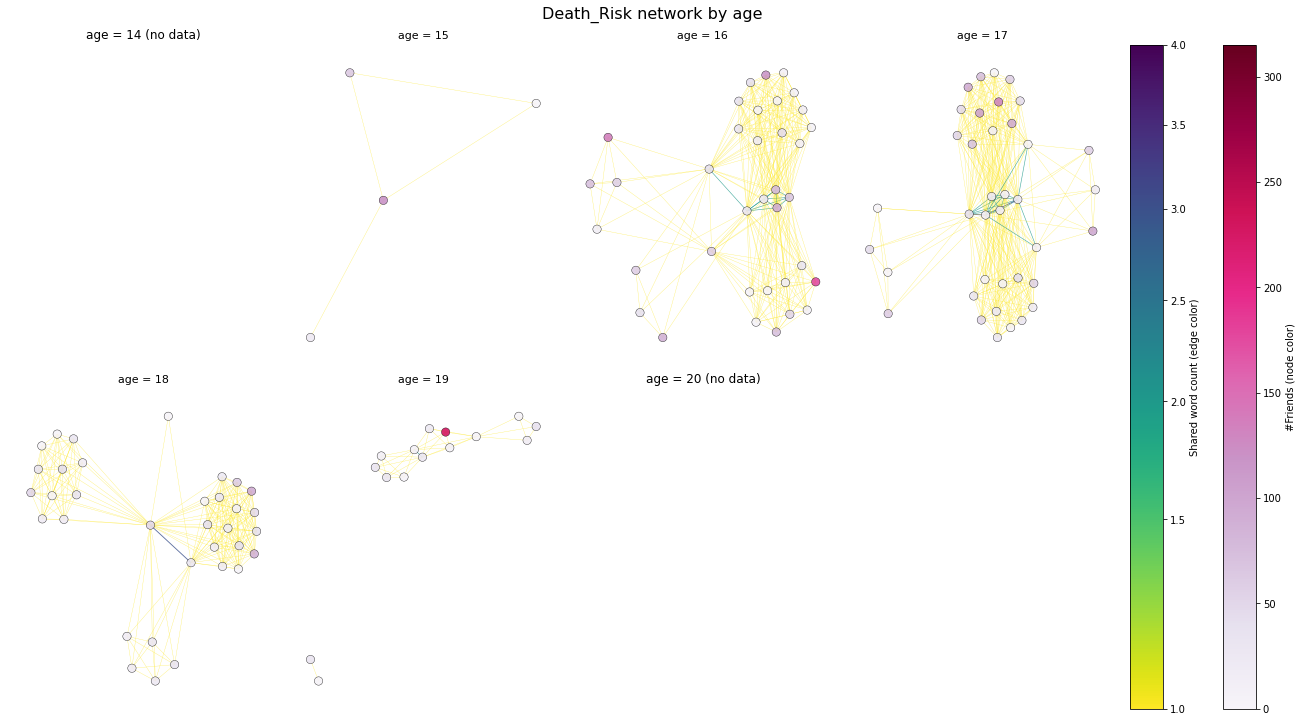

In [ ]:
plot_network_by_friends_and_demographics("death_risk", split_by="gender")
plot_network_by_friends_and_demographics("death_risk", split_by="age")